## Dataset that details charges on medical insurance 
Includes several different kind of data columns affecting the charges. 
Let´s explore!

In [87]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')

Lets have a look at our data!

In [88]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [90]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [91]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [93]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box',
                   nbins=47,  
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


Well some kind of youth offer? Any other theories?

### Let's dig into BMI

In [94]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

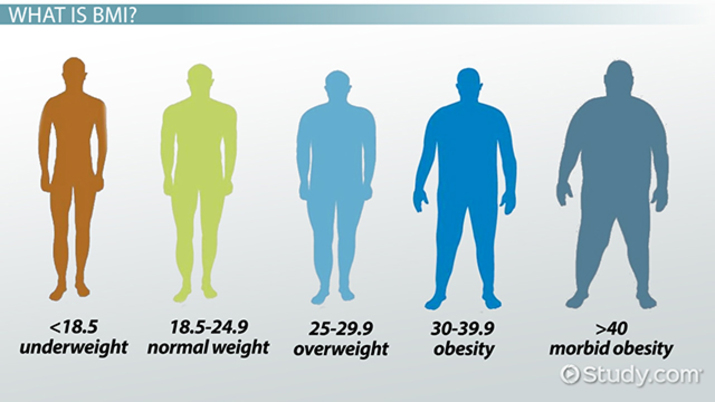

How about charges? There was quite a gap between mean and median.
Any other variables affecting that? BMI? Smoking? Let's check.

In [95]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smoking is expensive.

In [96]:
medical_df.smoker.value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [97]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

### Age and charges
Could age affect costs?

In [98]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker',
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

If we replace smoker with bmi?

In [99]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='bmi',
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

BMI, charges and smoker?

In [100]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## Correlation 
How well connected are two columns (growth in one leads to growth in another)

In [101]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

## This has some correlation.

In [102]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

How about smoking? It´s a categorical and needs some conversion:

In [103]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

Yeah, thats correlation. 
Correlation tells Strength between -1 and 1, where the middle 0 is no correlation and the absolute value is the strength.
Negative values tells us it´s a negative correlation. Smoking and life span could be one for example. Smoking correlates (I guess) with lower life expectancy.
Positive values is related the other way, when one increases, the other increases too.
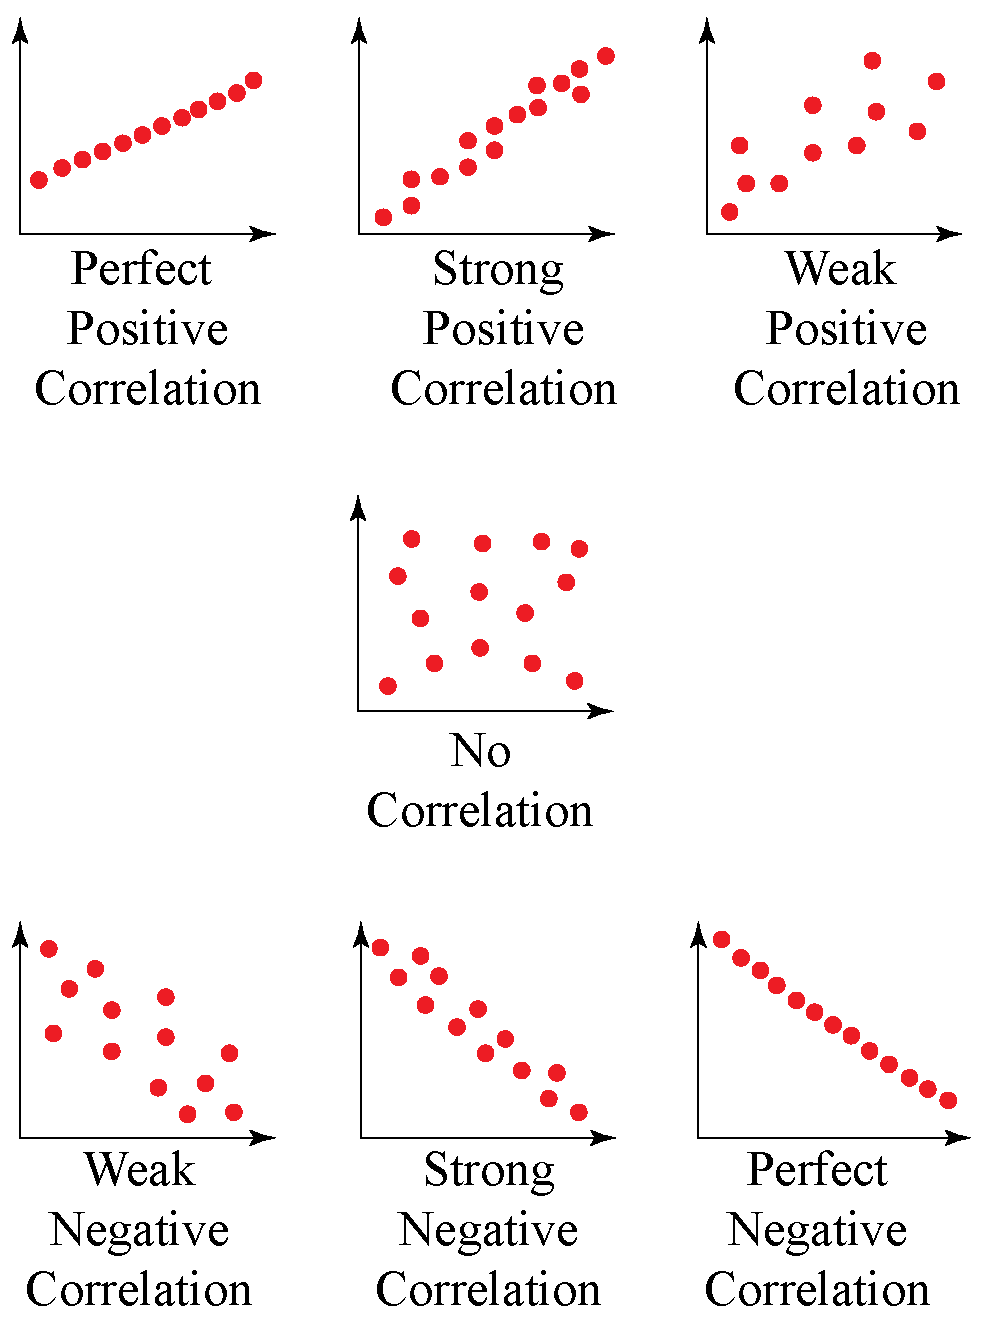

Pandas has a general correlation method. 

In [104]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


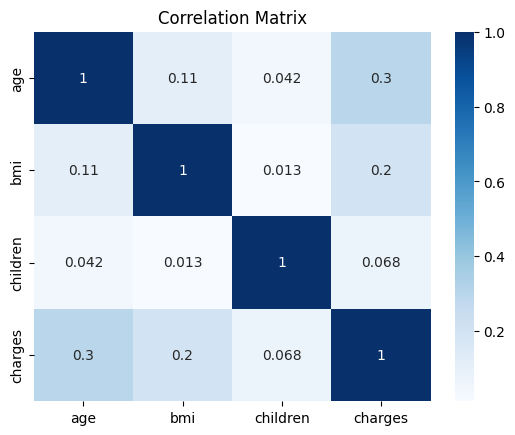

In [105]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

Correlation is not causation...

### Let's do some regression

In [106]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

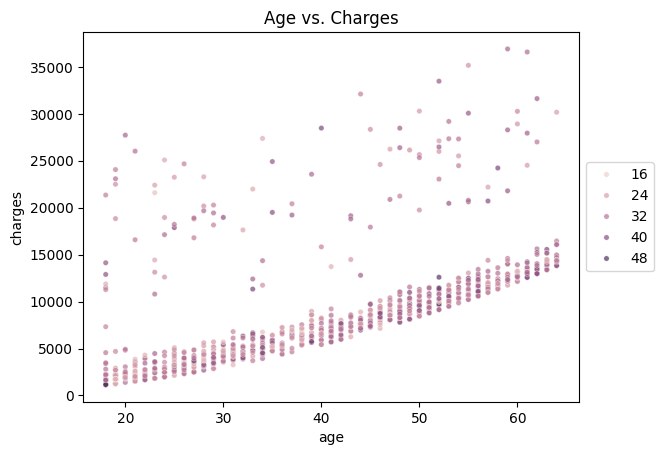

In [107]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', hue = 'bmi', alpha=0.7, s=15);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

It kind of looks like a line there...

$y=wx+b$

w is the slope, b is the intercept

Our model is: 

$ charges = w * age + b $

In [108]:
def estimate_charges(age, w, b):
    return w * age + b

Lets take a guess on w and b

$ w = 50 $ 

$ b= 100 $

In [109]:
w= 50 
b= 100

In [110]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

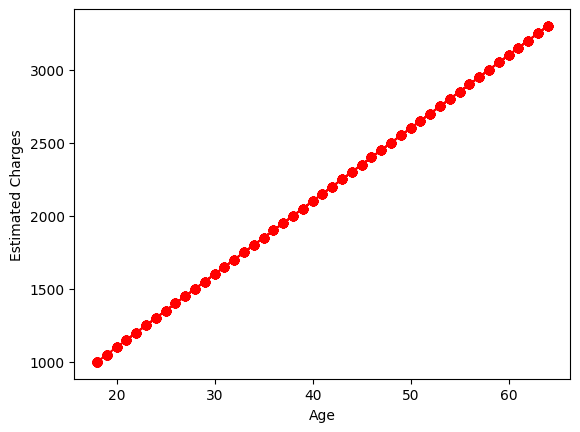

In [111]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

How does it fit with our data?

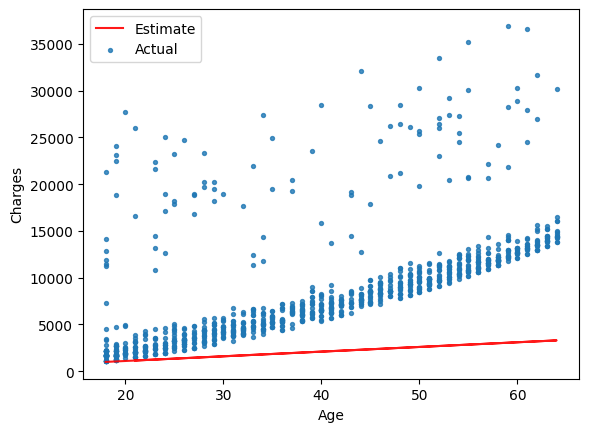

In [112]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [113]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

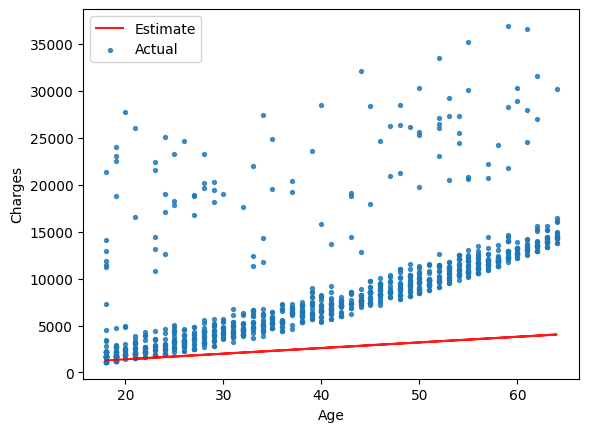

In [114]:
try_parameters(60, 200)

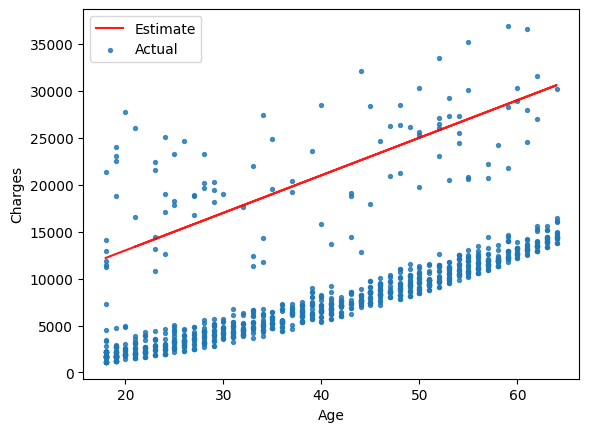

In [115]:
try_parameters(400, 5000)

This is better but still a bit boring, could we do this a bit more automated...
Two things needed:
1. We need to measure numerically how well the line fits the points.
2. We need a way to adjust *w* and *b* to improve the fit.

## Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

$ RMSE = \sqrt{\frac{\displaystyle\sum_{i=1}^N (Predicted_i-Actual_i)^2}{N}} $

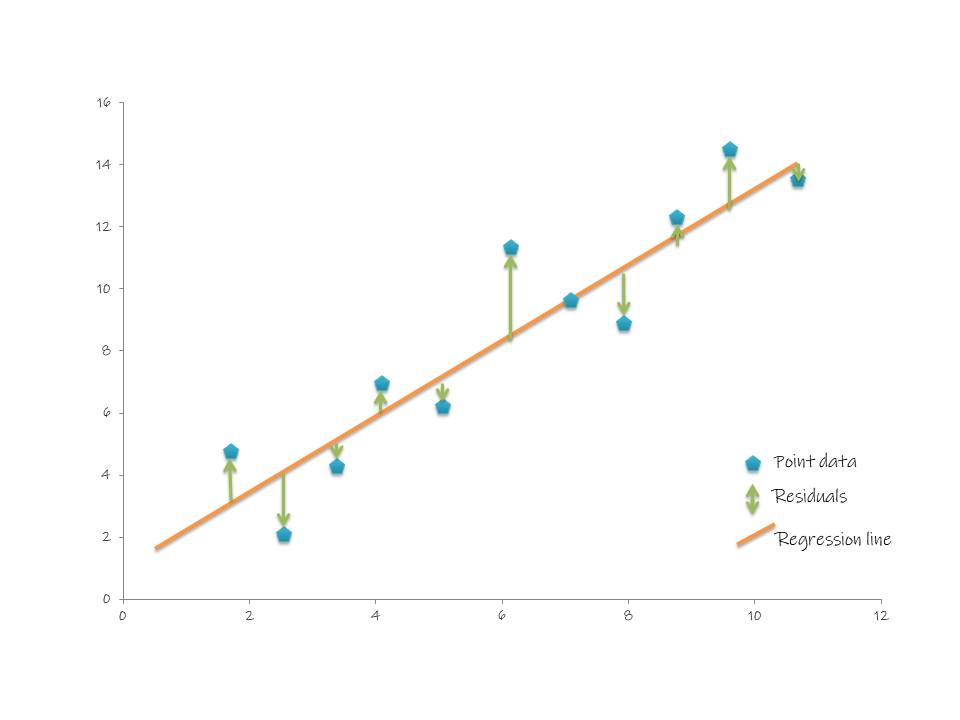




In [116]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's try it out with a sample $ w $ and $ b $

In [117]:
w = 50
b = 100

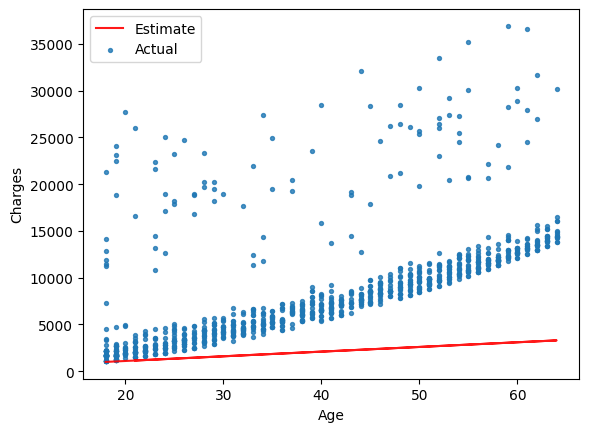

In [118]:
try_parameters(w,b)

In [119]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [120]:
rmse(targets, predicted)

np.float64(8461.949562575493)

On average our prediction differs $8461.949562575493$ from our target.
This is called loss and indicates how well or bad the model is predicting the variables in our target.

### Lower loss = better model 

We can include the loss in our method

In [121]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4731.657454345046


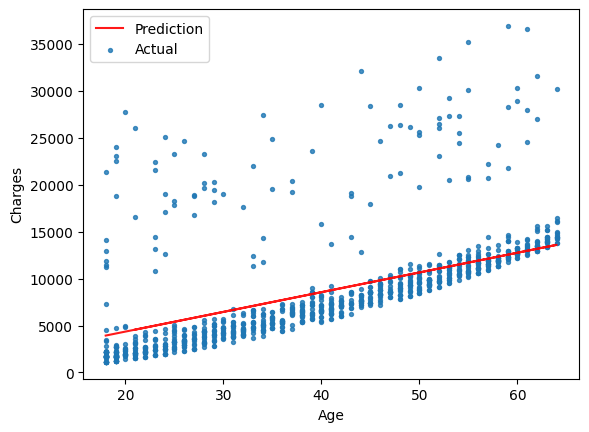

In [122]:
try_parameters(210,150)

How low loss can we get manually?

### Optimizer

Now it´s time for part two in our automation
Improving the fit (lessening loss) of our model.
Two main methods
* Ordinary least squares - better for smaller datasets [Ordinary least square](https://en.wikipedia.org/wiki/Ordinary_least_squares)
* Stochastic gradient descent - better for larger datasets - [Stochastic gradient descent](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)

The first one uses matrix operations to calculate the best w and b while the second one is iterative, essentially our manual method, automated with the help of derivate-functions

These are never implemented so here ends our journey into math. 

In [123]:
from sklearn.linear_model import LinearRegression
#Class import from module
model = LinearRegression()
#We instantiate an instance of the class.

In [124]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [125]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
# X and y
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [126]:
mymodel = model.fit(inputs.values, targets.values)
mymodel

LinearRegression()

In [127]:
mymodel.predict(np.array([[24],[53],[64]]))

array([ 4322.55335138, 12072.77182349, 15012.50986463])

Is these predictions somewhat valid, let´s check the graph?

Ok, lets run our dataset and predict and check our loss.

In [128]:
predictions = model.predict(inputs.values)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [129]:
rmse(targets, predictions)

np.float64(4662.505766636395)

Better than my best guess! ~4700

In [130]:
model.coef_

array([267.24891283])

Not so bad Björn

In [131]:
model.intercept_

np.float64(-2091.4205565650864)

A bit more of

RMSE Loss:  4662.505766636395


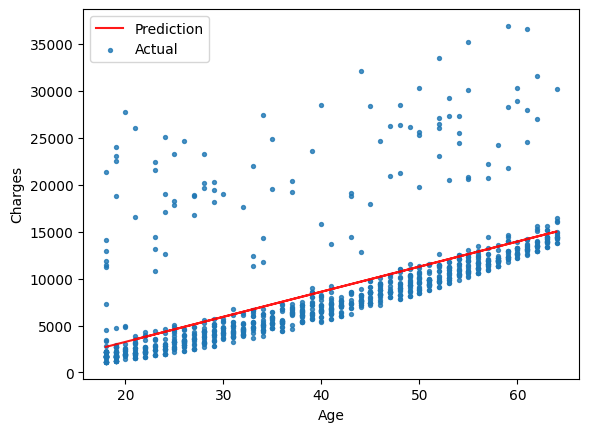

In [132]:
try_parameters(model.coef_, model.intercept_)

We now have our first machine learning model!
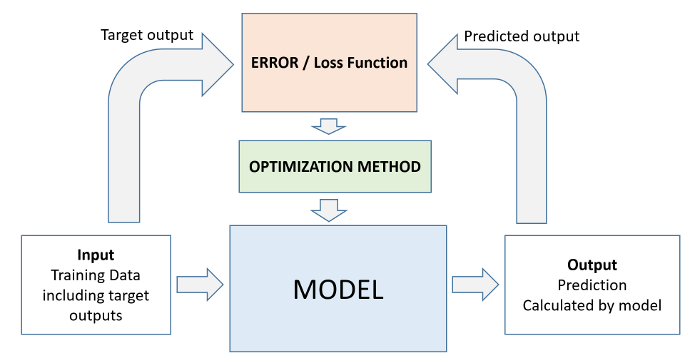

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [133]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


That was bad... We got less than 0.2 less loss. That´s not worth it at all.

In [134]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

And the correlation is almost non existant.

In [135]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We should have checked correlation and exlored before.

But lets do some fancy visualization since we have involved three params.

In [136]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

More params makes for harder visual comprehension. 
We can still use our models params.

In [137]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

So $w_1$ is 266 and $w_2$ is 7 thats almost 40x the influence and bmi influence might be fully random.

> **EXERCISE**: Train a linear regression model to estimate charges using BMI alone. Do you expect it to be better or worse than the previously trained models?

In [138]:
inputs = non_smoker_df[['bmi']]
targets = non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5969.772531913293


In [139]:
model.coef_,model.intercept_

(array([83.35055766]), np.float64(5879.424081872975))

In [140]:
def try_parameters_bmi(w, b):
    bmi = non_smoker_df.bmi
    target = non_smoker_df.charges
    predictions = estimate_charges(bmi, w, b)
    
    plt.plot(bmi, predictions, 'r', alpha=0.9);
    plt.scatter(bmi, target, s=8,alpha=0.8);
    plt.xlabel('BMI');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5969.772531913293


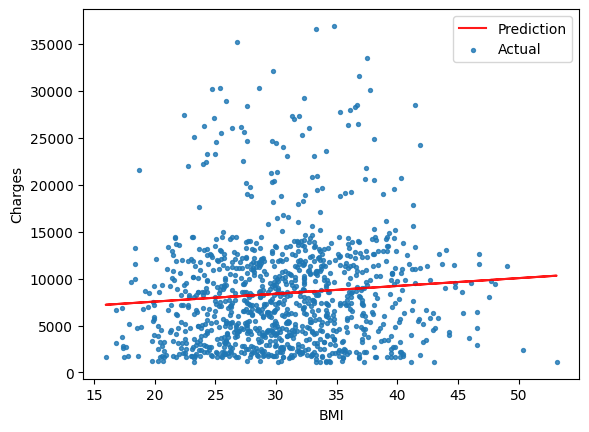

In [141]:
try_parameters_bmi(model.coef_, model.intercept_)

> **EXERCISE**: Train a linear regression model to estimate charges using age, bmi and children. Do you expect it to be better or worse than the previously trained models?

In [142]:
inputs = non_smoker_df[['bmi', 'age', 'children']]
targets = non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


> **READING** Read and try to understand the contents of [This KD Nuggets article](https://www.kdnuggets.com/2023/08/7-steps-mastering-data-cleaning-preprocessing-techniques.html)

## What about smoking?
We know that the smoking column had the highest correlation when we normalized the categorical columns.

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



In [143]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [144]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984782)

Yeah thats correlation!

In [145]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [146]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


But there is more columns.

<Axes: xlabel='sex', ylabel='charges'>

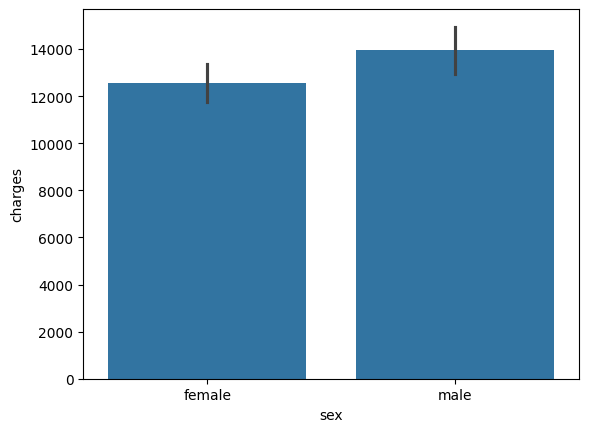

In [147]:
sns.barplot(data=medical_df, x='sex', y='charges')

Let´s make that one into a binary too.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

In [148]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [149]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202531)

This wont make a big impact. But lets do it anyways!

In [150]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


Well 0.33 is something. It´s nothing to write home about and probably less than random noice. But it is something.

Now the last one
## Regions

One-hot encoding... How? 
We have four values northeast, northwest, southeast and southwest.

In [151]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [152]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [153]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

Almost a bit unwieldy...

In [154]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [169]:
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [155]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [156]:
model.intercept_

np.float64(-12525.547811195444)

In [157]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


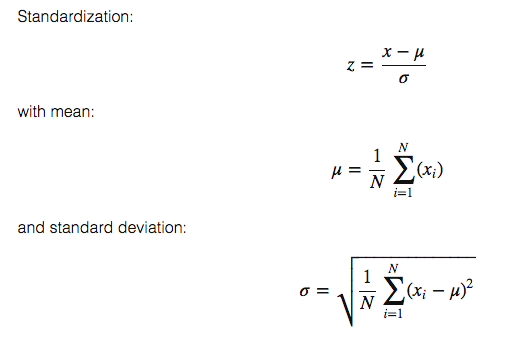

In [158]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler

StandardScaler()

In [161]:
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [162]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [163]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [164]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

We will take the categoricals

In [165]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [167]:
inputs = np.concatenate((scaled_inputs,categorical_data), axis=1)
targets = medical_df.charges

#creating and train a model
model = LinearRegression().fit(inputs, targets)

#predictions are made:

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.679651174452


In [173]:
import sklearn.metrics as metrics

r2 = metrics.r2_score(targets, predictions)
mse = metrics.mean_squared_error(targets, predictions)
r2, mse, np.sqrt(mse)

(0.7509130345985205,
 np.float64(36501893.00741545),
 np.float64(6041.679651174452))

In [168]:
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [170]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [ ]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

Once again, this leads to a fairly small reduction in the loss. 

> **EXERCISE**: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

> **Reading**
https://www.keboola.com/blog/linear-regression-machine-learning